# Student Performance Indicator
## Life cycle of Machine learning Project



#### - Understanding the Problem Statement
#### - Data Collection
#### - Data Checks to perform
#### - Exploratory data analysis
#### - Data Pre-Processing
#### - Model Training
#### - Choose best model


## Problem statement

#### - This project understands how the student's test scores is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## Data Collection

#### - Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
#### - The data consists of 8 column and 1000 rows


## Import Needed Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [31]:
# uplaod data

df = pd.read_csv('data\\stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
# confirm total rows and columns
df.shape

(1000, 8)

## DataFrame Information:
##### - gender : sex of students -> (Male/female)
##### - race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
##### - parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
##### - lunch : having lunch before test (standard or free/reduced)
##### - test preparation course : complete or not complete before test
##### - math score
##### - reading score
##### - writing score

## Data Checks to perform:

##### - Check Missing values
##### - Check Duplicates
##### - Check data type
##### - Check the number of unique values of each column
##### - Check statistics of data set
##### - Check various categories present in the different categorical column



In [33]:
# Check missing values
# no missing values

df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [34]:
# check duplicates
# no duplicated rows

df.duplicated().sum()

0

In [35]:
# check data type

df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [36]:
#check total unique values in each column

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [37]:
# check statistics for numaric features

df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [38]:
# exploring categorical features

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [39]:
# features are divided into 2 cells

print("gender unique value count:\n", df['gender'].value_counts())
print("------------\n")

print("ethnicity unique value count:\n", df['race_ethnicity'].value_counts())
print("------------\n")

print("parental level of education unique value count:\n", df['parental_level_of_education'].value_counts())
print("------------\n")

gender unique value count:
 gender
female    518
male      482
Name: count, dtype: int64
------------

ethnicity unique value count:
 race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
------------

parental level of education unique value count:
 parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
------------



In [40]:
print("lunch condition unique value count:\n", df['lunch'].value_counts())
print("------------\n")

print("test preparation course unique value count:\n", df['test_preparation_course'].value_counts())
print("------------\n")

lunch condition unique value count:
 lunch
standard        645
free/reduced    355
Name: count, dtype: int64
------------

test preparation course unique value count:
 test_preparation_course
none         642
completed    358
Name: count, dtype: int64
------------



In [41]:
# define numerical & categorical features columns

numerical_columns = [x for x in df. columns if df[x].dtype != 'O']
categorical_columns = [x for x in df.columns if df[x].dtype == 'O']

print(numerical_columns)
print(categorical_columns)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [42]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [43]:
# Adding columns for "Total Score" & "AVG Score"
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333



### Data visualization

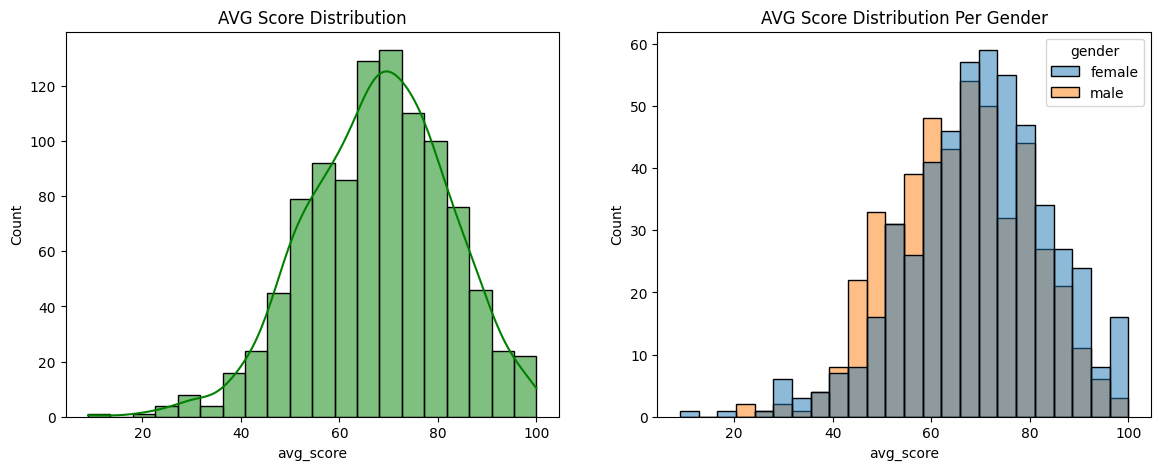

In [74]:
# AVG scoere histogram per gender

fig, axs = plt.subplots(1,2, figsize =(14,5))
plt.subplot(121)
sns.histplot(data = df, x ='avg_score',bins = 20 , kde=True, color='g')
plt.title('AVG Score Distribution')
plt.subplot(122)
sns.histplot(data=df, x= 'avg_score', hue='gender')
plt.title('AVG Score Distribution Per Gender')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

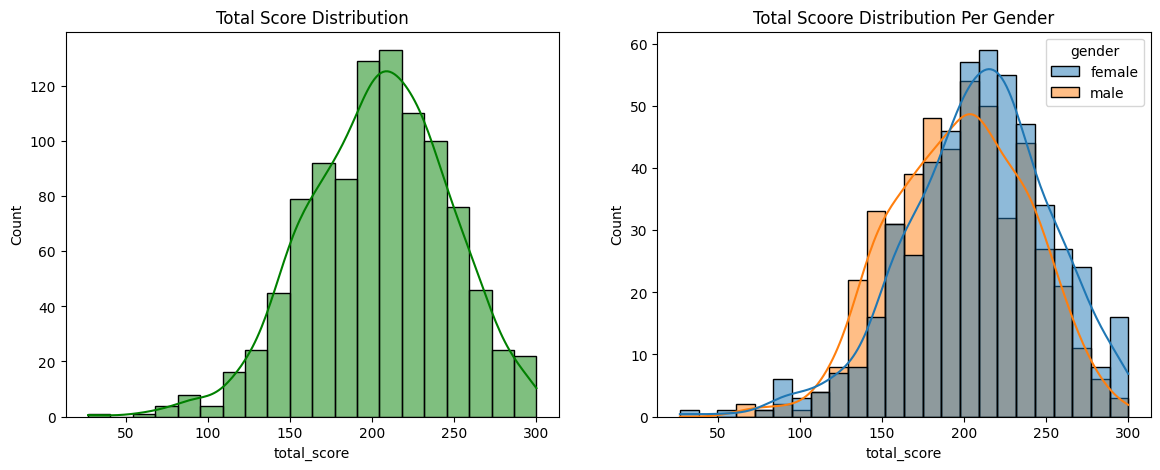

In [73]:
fig, axs = plt.subplots(1,2, figsize=(14,5))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins =20, kde=True, color='g')
plt.title('Total Score Distribution')
plt.subplot(122)
sns.histplot(data=df, x='total_score', hue='gender', kde=True)
plt.title('Total Scoore Distribution Per Gender')
plt.show

Text(0.5, 1.0, 'AVG Score Per Lunch Type - Male')

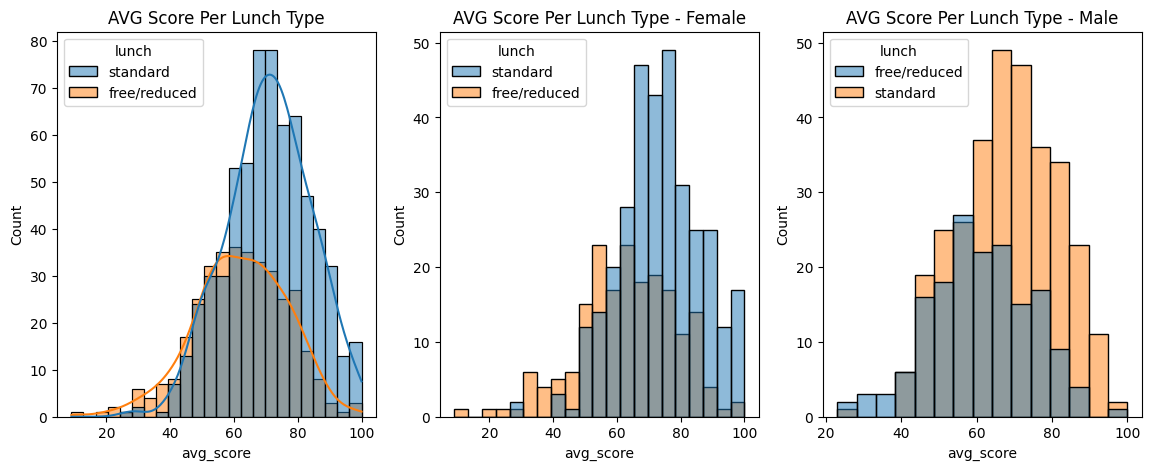

In [70]:
fig, axs = plt.subplots(1,3, figsize=(14,5))
plt.subplot(131)
sns.histplot(data=df, x= 'avg_score', hue='lunch', kde=True)
plt.title("AVG Score Per Lunch Type")
plt.subplot (132)
sns.histplot(data=df[df['gender']=='female'], x='avg_score', hue='lunch' )
plt.title("AVG Score Per Lunch Type - Female")
plt.subplot (133)
sns.histplot(data=df[df['gender']=='male'], x='avg_score', hue='lunch' )
plt.title("AVG Score Per Lunch Type - Male")

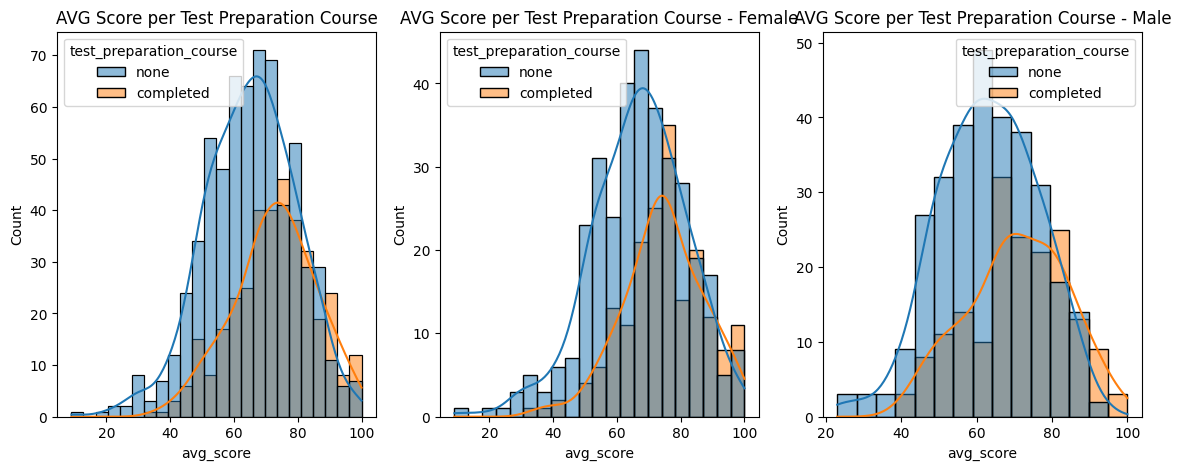

In [79]:
fig, axs = plt.subplots(1,3, figsize=(14,5))
plt.subplot(131)
sns.histplot(data=df, x="avg_score", kde=True, hue ='test_preparation_course')
plt.title("AVG Score per Test Preparation Course")
plt.subplot(132)
sns.histplot(data=df[df['gender']=='female'], x="avg_score", kde=True, hue ='test_preparation_course')
plt.title("AVG Score per Test Preparation Course - Female")
plt.subplot(133)
sns.histplot(data=df[df['gender']=='male'], x="avg_score", kde=True, hue ='test_preparation_course')
plt.title("AVG Score per Test Preparation Course - Male")
plt.show()

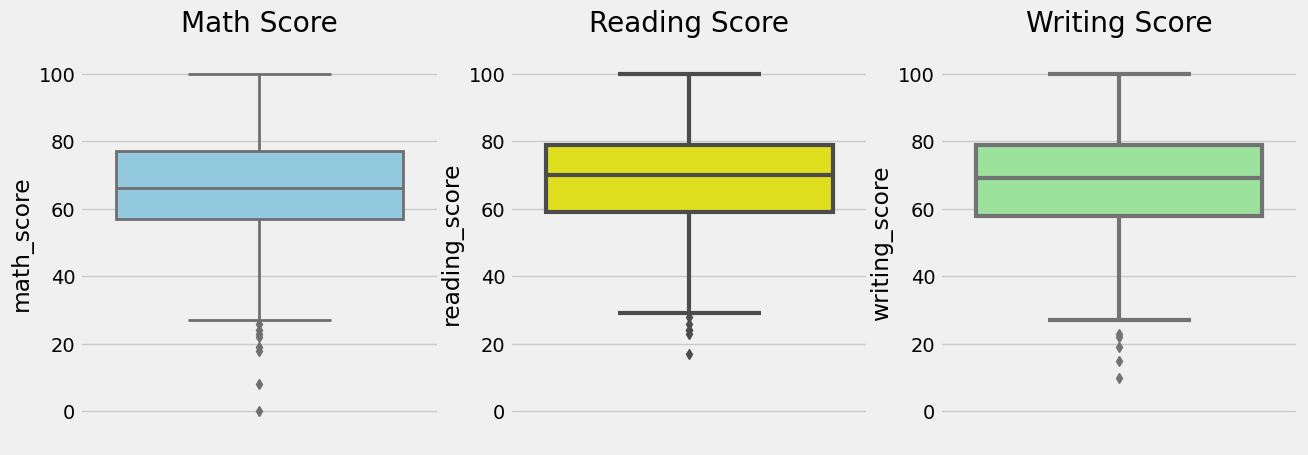

In [259]:
# Check for outliers

plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
plt.ylim(-10,110)
plt.title("Math Score")
sns.boxplot(y="math_score", data=df, color='skyblue', linewidth=2)
plt.subplot(1,3,2)
plt.ylim(-10,110)
plt.title('Reading Score')
sns.boxplot(y='reading_score', data=df, color='yellow', linewidth=3)
plt.subplot(1,3,3)
plt.ylim(-10,110)
plt.title('Writing Score')
sns.boxplot(y='writing_score', data=df, color='lightgreen', linewidth=3)
plt.show()

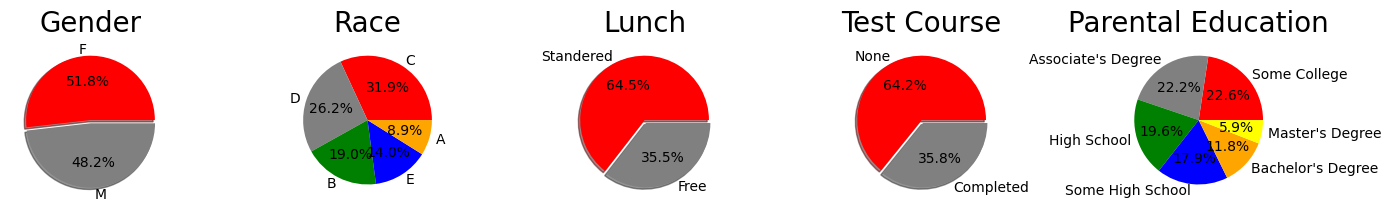

In [151]:
# Multivariate analysis using pieplot

plt.rcParams['figure.figsize']=(14,5)
plt.subplot(151)
size = df['gender'].value_counts()
labels = 'F', 'M'
color = ['red', 'gray']
plt.pie(size,colors=color, labels=labels, autopct='%2.1f%%', explode=[0,0.05], shadow=True)
plt.title('Gender', fontsize =20)
plt.axis('off')

plt.subplot(152)
size = df['race_ethnicity'].value_counts()
labels = 'C', 'D','B','E','A'
color= ['red','gray','green','blue','orange']
plt.pie(size,colors=color,labels=labels, autopct='%2.1f%%')
plt.title('Race', fontsize =20)
plt.axis('off')

plt.subplot(153)
size =df['lunch'].value_counts()
labels = 'Standered', 'Free'
color=['red', 'gray']
plt.pie(size, colors=color,labels=labels, autopct='%2.1f%%',explode=[0,0.05], shadow=True)
plt.title('Lunch', fontsize =20)
plt.axis('off')

plt.subplot(154)
size = df['test_preparation_course'].value_counts()
labels = 'None','Completed'
color=['red','gray']
plt.pie(size, colors=color, labels=labels, autopct='%2.1f%%', explode=[0,0.05], shadow=True)
plt.title('Test Course', fontsize =20)
plt.axis('off')



plt.subplot(155)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'gray', 'green', 'blue', 'orange', 'yellow']
plt.pie(size,colors=color,labels=labels,autopct='%2.1f%%')
plt.title('Parental Education', fontsize =20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()


### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )


In [167]:
gender_group  = df[['gender', 'math_score', 'reading_score', 'writing_score', 'total_score', 'avg_score']].groupby('gender').mean()
gender_group.head()


,math_score,reading_score,writing_score,total_score,avg_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


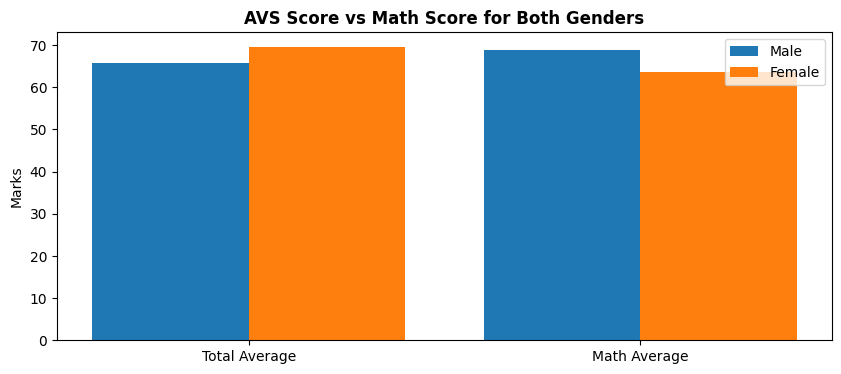

In [172]:
plt.figure(figsize=(10, 4))
X = ['Total Average','Math Average']


female_scores = [gender_group['avg_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['avg_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("AVS Score vs Math Score for Both Genders", fontweight='bold')
plt.legend()
plt.show()



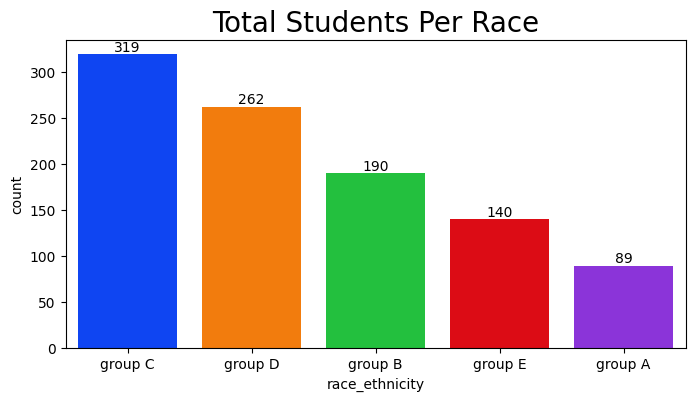

In [223]:

# most of the student belonging from group C and group D
# lowest number of students belong to group A


plt.figure(figsize=(8,4))
ax= sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',saturation=0.90, order=df['race_ethnicity'].value_counts(ascending=False).index)
abs_values = df['race_ethnicity'].value_counts(ascending=False).values  
ax.bar_label(container=ax.containers[0], labels=abs_values)

plt.title('Total Students Per Race', fontsize=20)
plt.show() 

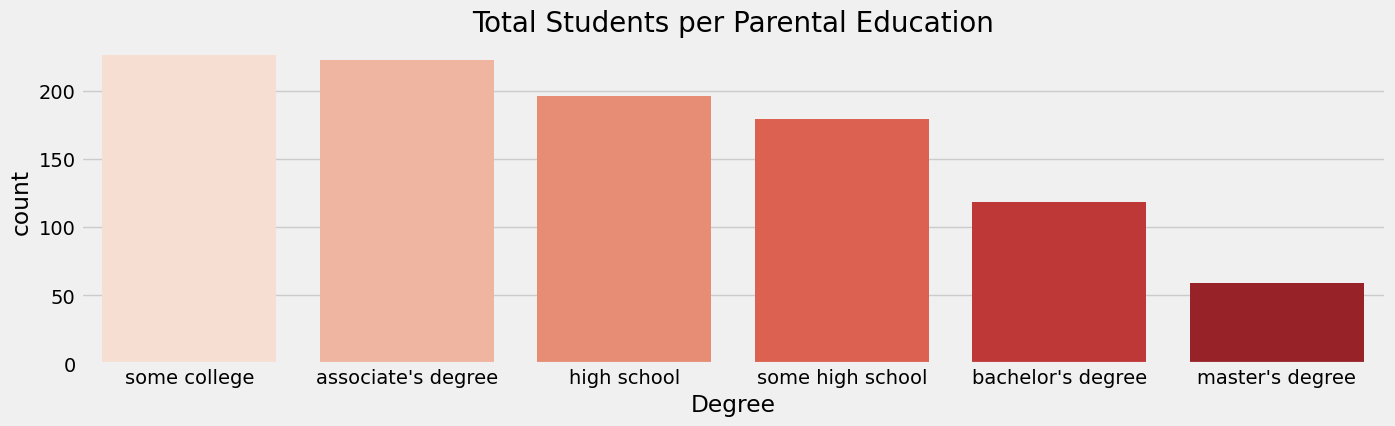

In [240]:

# The highest counts are from collagem associate's dgree

plt.rcParams['figure.figsize'] = (15, 4)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental_level_of_education'], data=df, palette = 'Reds', 
              order=df['parental_level_of_education'].value_counts(ascending=False).index )
plt.title('Total Students per Parental Education', fontweight = 15, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()



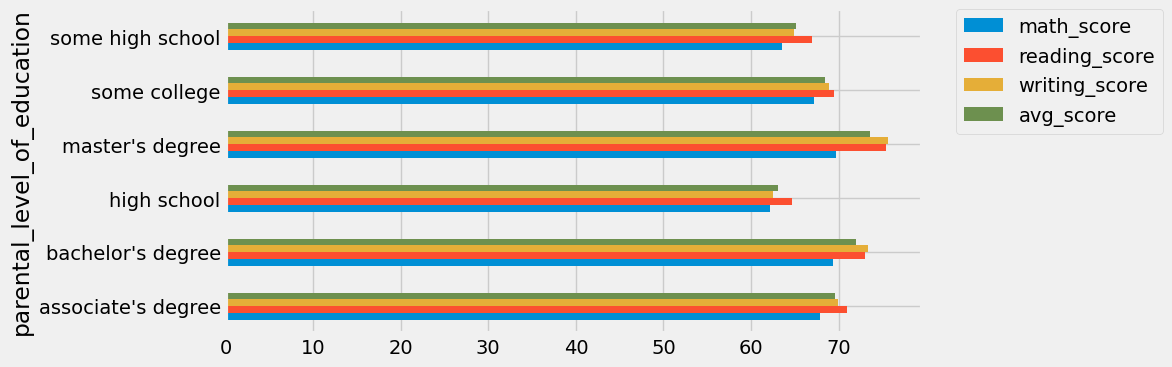

In [251]:
# the score of student whose parents possess master and bachelor level education are slightly higher than others

df[['parental_level_of_education', 'math_score', 'reading_score', 'writing_score',
     'avg_score']].groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(8,4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



<Axes: xlabel='lunch', ylabel='writing_score'>

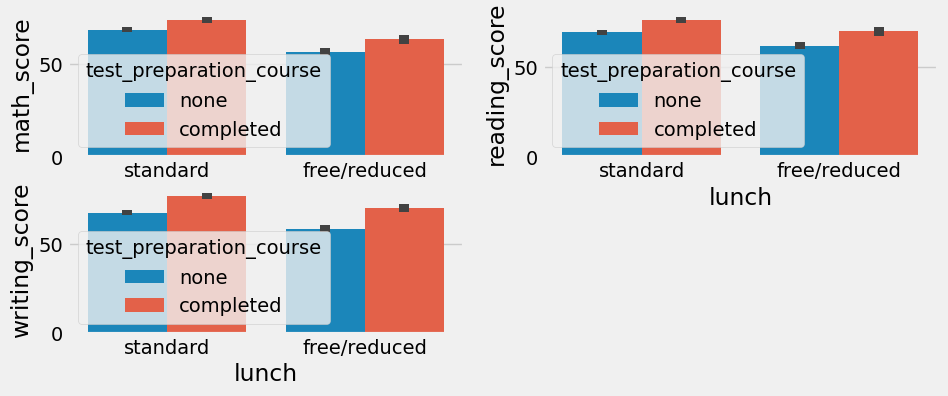

In [257]:
plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])



<Figure size 800x400 with 0 Axes>

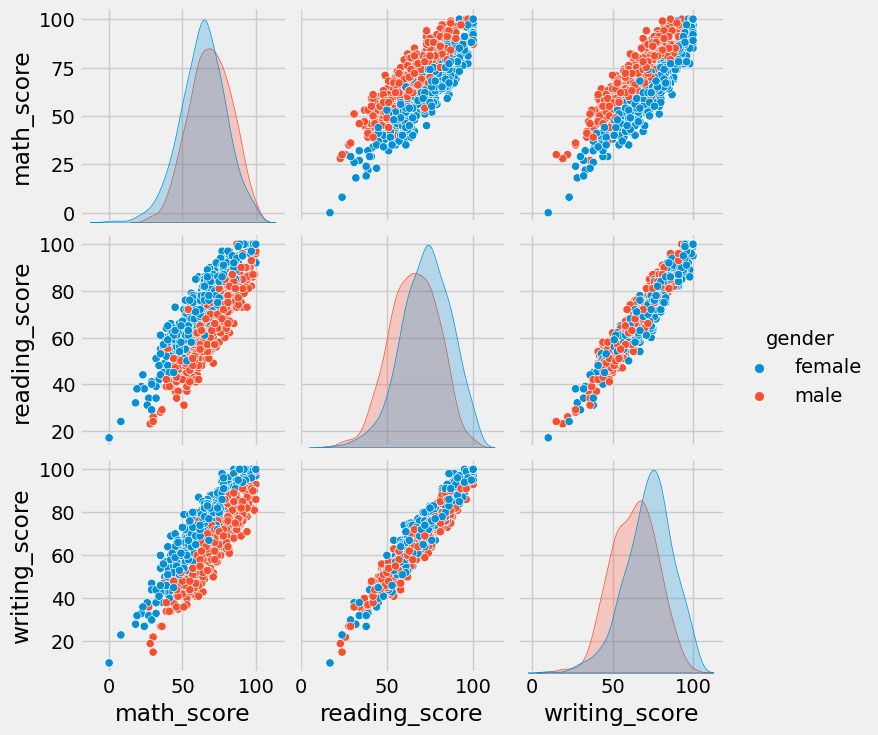

In [264]:
#From the below plot it is clear that all the scores increase linearly with each other, specially reading and writing

plt.figure(figsize=(8,4))
sns.pairplot(df[['gender','math_score','reading_score','writing_score']],hue = 'gender')
plt.show()

